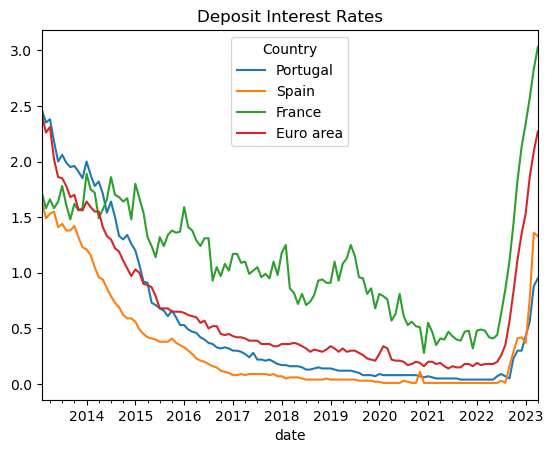

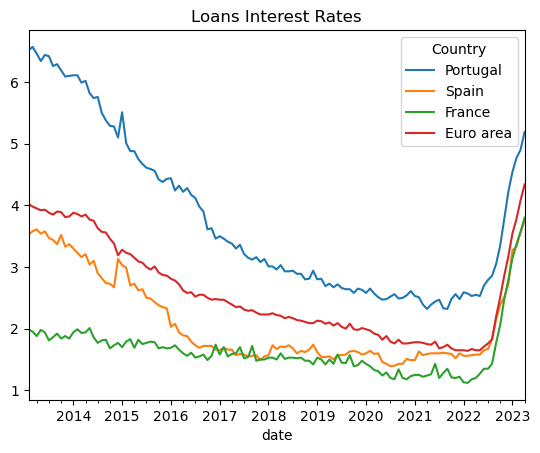

In [1]:
Dep="https://github.com/masterfloss/dataFinance/raw/main/DepLess1Y.xlsx"
Loans="https://github.com/masterfloss/dataFinance/raw/main/LoansRevolving.xlsx"
Countries=['Portugal', 'Spain', 'France', 'Euro area']
    
import pandas as pd

def show_interest_rates(file, countries, name, begining):
    df = pd.read_excel(file, header=4)
    df = df.drop(df.columns[0], axis=1).set_index('Country').T.reset_index()
    df['date'] = pd.to_datetime(df['index'], format='%Y-%m')
    df = df.set_index('date')
    df_filtered = df[df.index > begining ]
    return df_filtered[countries].plot(title=name )

ax=show_interest_rates(Dep, Countries,"Deposit Interest Rates","2013-01-01")
ax=show_interest_rates(Loans,Countries,"Loans Interest Rates","2013-01-01")


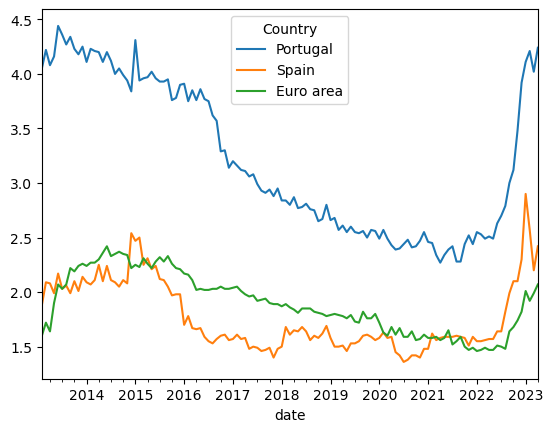

In [5]:
def read_manipualte_data(file):
    df = pd.read_excel(file, header=4)
    df = df.drop(df.columns[0], axis=1).set_index('Country').T.reset_index()
    df['date'] = pd.to_datetime(df['index'], format='%Y-%m')
    return df.set_index('date')

def show_compare(df1,df2,countries, begining):
    merged_df = pd.merge(df1, df2, left_index=True, right_index=True, suffixes=('_1', '_2'))
    for i in countries:
        merged_df[i]=merged_df[i+'_1']-merged_df[i+'_2']
    return merged_df[(merged_df.index>begining)].plot(y=countries)


df1=read_manipualte_data(Loans)
df2=read_manipualte_data(Dep)
ax=show_compare(df1,df2,['Portugal','Spain','Euro area'],"2013-01-01")